#0 - General Concepts

##Artificial Intelligence

Artificial intelligence has many definitions, but they all boil down to simulating human intelligence using machines. In other words, artificial intelligence is a branch of computing dealing with the simulation of learning and intelligent behavior in machines; we are trying to make machines imitate human intellect.

##Machine Learning

Machine learning is a branch of artificial intelligence and deals with giving a computer the ability to gain knowledge without being explicitly programmed to do so. In other words, machine learning occurs when a computer adjusts itself based on data it has been exposed to.

##Deep Learning

Deep learning is a subset of machine learning, where artificial neural networks are created to simulate the human brain. Here, the computer learns from exposure to many different datasets and perform a task repeatedly until it is closer to a specific outcome.

#1 - Building a Model

For this exercise, we will be building a convultional neural network over the CIFAR-10 dataset, which is a dataset containing 60,000 32x32 colored images of 10 different classes. 50,000 of those images belong to the training set and 10,000 of those belong to the test set.

In machine learning, the training set is the set of images that the model will be using to fit to the paramets and the test set is the set of images containing an unbiased evaluation of a final model fit on the training dataset

##Initialization of CIFAR10



In [26]:
#Importing tensorflow, keras, matplotlib, and numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#Loading CIFAR10
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#Normalize images
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

#Cateforize labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]

print("train_images shape:\t",train_images.shape)
print("test_images shape:\t", test_images.shape)

train_images shape:	 (50000, 32, 32, 3)
test_images shape:	 (10000, 32, 32, 3)


##Building a CNN

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD

model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)            

###Explanation

From the above, we can see that we have created a convolutional neural network (CNN), which is simply a neural network that uses some form of convolution. A CNN works on images by finding important aspects or patterns in an image and highlighting them to help recognize patterns in the dataset; CNN's take advantage of patterns in images and uses them to help categorize each image for the layer.

In our model, we use a combination of convolutional layers and maxpooling to highlight features of the image then downsampling the image to help the network recognize these patterns. We then use "dropout" to randomly remove data from our network to help avoid overfitting - by using dropout, we remove some of the codependency some neurons have on each other.

We then flatten our output to turn it into a column vector and use a dense layer to classify these outputs.

Finally, we use one last dense layer with softmax activation to get the probability distribution of what class an item is in. It should be noted that the softmax function returns a value from 0-1, and we can therefore use it to create a probability distribution of what class an item is in.

We assume the class with the highest probability is our item.

#2 - Compiling a Model

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Compiling your model requires it to have an optimizer and a loss function.

In machine learning, an optimizer is a function or algorithm used to change the attributes of your model to help reduce loss. These attributes include the model's learning rate (a tuning parameter used to calculate the step size at each iteration when moving toward the minimum of a loss function) and the weights.

Weights correspond to the strength of the connection between nodes; the lower the weight, the less change a node will see.

The loss function will give us meaningful information about the incorrect labeling of an object. For example, the categorical crossentropy loss function, which is the loss function our model uses, is used when each image belongs to one class (single label data classification) and compares the probability distribution obtained by our softmax function with the true distribution. In other words, categorical crossentropy is used when your output belongs only to one class, and the closer a model's output is to the true output, the lower the loss.

Other loss functions include squared loss and mean squared loss (used in linear regression models), Huber loss (used in robust regression and is sensitive to outliers), Poisson (used for regression when modeling count data), and Cosine proximity.

#3 - Training a Model

In [21]:
epochs = 10
batch_size = 64
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.7756 - acc: 0.3515 - val_loss: 1.6218 - val_acc: 0.4274
Epoch 2/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.4204 - acc: 0.4974 - val_loss: 1.3811 - val_acc: 0.5103
Epoch 3/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.2608 - acc: 0.5617 - val_loss: 1.2231 - val_acc: 0.5631
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1591 - acc: 0.5995 - val_loss: 1.1190 - val_acc: 0.6100
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.0877 - acc: 0.6279 - val_loss: 1.1686 - val_acc: 0.5988
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.0351 - acc: 0.6469 - val_loss: 1.0009 - val_acc: 0.6551
Epoch 7/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9965 - acc: 0.6640 - val_loss: 1.

In deep learning, an epoch corresponds to one pass of the training set. In other words, an epoch represents the amount of times an entire dataset is passed both forward and backwards through our neural network. Thus, by using more epochs, we will theoretically obtain more accurate results.

The batch size corresponds to the number of images grabbed per iteration. For example, our model has a batch size of 64, therefore it will grab 64 of the 50,000 training images per iteration, resulting in our model having 782 iterations (50,000/64 = 781.25, round up for the last iteration).

10000/10000 [==============================] - 4s 412us/sample - loss: 0.9419 - acc: 0.6885
Test accuracy: 0.6885


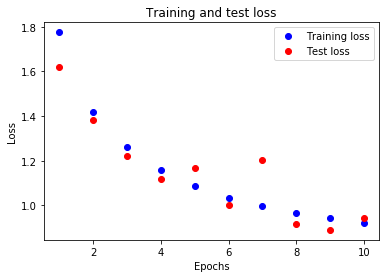

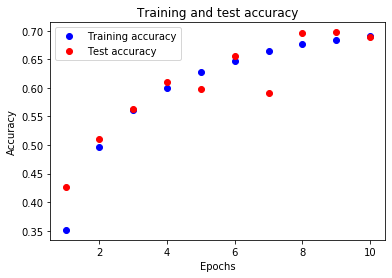

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After training our model, we find that our model is a correct fit for our dataset. However, there is the possibility that our model can overfit the data or underfit the data.

A model overfits a dataset when it has a low loss during training, but does a poor job categorizing new data and is caused by making a model more complex than necessary. When analyzing our training test and accuracy graph it is marked by a large distance between training loss and test loss. Similarly, overfit can be spotted when analyzing our training and test accuracies, where overfit occurs when there is a large distance between the two.

On the other hand, a model will underfit a dataset when our model tells us too little about the dataset. In other words, the model can neither model the training data nor generalize new data. Thus, underfit can be spotted with poor performance on the training data.

#4 - Fine Tuning a Model

From this point, we can fine tune this model to more accurately categorize new data. The goal of fine tuning a model is to tweak its parameters to allow it to adapt to a new task or dataset, usually similar to the one it was already pre-trained in. Because of this, we avoid the process having to retrain a whole new model, which can potentially take days, and instead we just use a pre-existing model on a new dataset. 

To do this, we would take the old model and use it as a base, then we add additional layers to this base to help deal with the new dataset. In other words, we are taking the features of our base model (through a process known as feature extraction) and using them in a new model. 